In [3]:
import numpy as np
import setting 
setting.load()
import noc
from noc.gramians import obsv
from noc.simulate import impulse
import matplotlib
import matplotlib.pyplot as plt
import noc.plotting as plotting 
from scipy.linalg import expm
noc.plotting.load()

In [4]:
w = np.loadtxt("../data/w")
n = np.shape(w)[0]
a = w - np.eye(n)
tau = 20e-3

In [5]:
# optogenetic experiment 
# if I am allowed to stimulate k cells only
# how should I stimulate them to best drive a k+1th cell? 
c = np.zeros((n,n))
c[0,0] = 1
n_stim = 10
b = np.zeros((n,n_stim))
for i in range(n):
    for j in range(n_stim):
        if i == (j + 165):
            b[i,j] = 1.
q = obsv(a,c)
# best possible stimulation using quadratic analysis (energy)
u, s, _ = np.linalg.svd(b.T.dot(q).dot(b)) 
x0 = b.dot(u).T
x0_opto_mod = x0 / np.linalg.norm(x0, axis=1).reshape(-1,1)
_, opto_obs_best = impulse(a,tau,n, x0_opto_mod[0,:],0.3)

# best possible stimulation using non-quadratic analysis (magnitude)
c = np.zeros((n,1))
c[0] = 1
ainv = - np.linalg.inv(a) 
x0 = c.T.dot(ainv).dot(b).dot(b.T) 
x0 = x0 / np.linalg.norm(x0, axis=1).reshape(-1,1)
ts, opto_best = impulse(a,tau,n,x0[0,:],0.3)

x0 = np.random.randn(100,n_stim).dot(b.T) 
x0_opto_random = x0 / np.linalg.norm(x0, axis=1).reshape(-1,1)
xs_rand = np.hstack([impulse(a,tau,n,x0,0.3)[1][:,1].reshape(-1,1) for x0 in x0_opto_random])
opto_obs_random = np.hstack([np.mean(xs_rand,axis=1).reshape(-1,1), np.std(xs_rand,axis=1).reshape(-1,1), xs_rand])

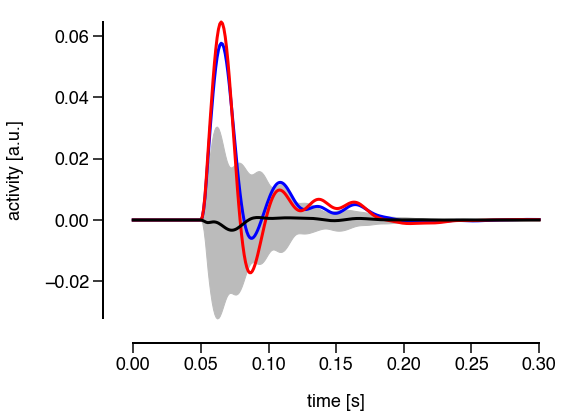

In [7]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)
ax = fig.add_subplot(1,1,1)
plotting.adjust_spines(ax.spines)
ax.fill_between(ts,opto_obs_random[:,0]-opto_obs_random[:,1],opto_obs_random[:,0]+opto_obs_random[:,1],color="#BBBBBB")
ax.plot(ts,opto_best[:,0],color="blue",linewidth=3)
ax.plot(ts,opto_obs_best[:,0],color="red",linewidth=3)
ax.plot(ts,opto_obs_random[:,0],color="black",linewidth=3)
ax.set_ylabel("activity [a.u.]")
ax.set_xlabel("time [s]")
plt.show()